In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import kn
from scipy.interpolate import interp1d
import astropy.constants as ct
import pandas as pd

$$\Omega_\psi h^2\approx 0.3\left(\dfrac{M_\psi}{0.1\text{ GeV}}\right)\left(\dfrac{1\text{ TeV}}{M_S}\right)\left(\dfrac{y_{s,p}}{10^{-10}}\right)^2$$

In [4]:
ys = np.array([1e-9,1e-10,1e-11,1e-12])
Mpsis = np.logspace(-3,3,100) # GeV
MS = 2

Omegah2 = []

for y in ys:
    Omegah2.append(0.3*(Mpsis/0.1)*(1/MS)*(y*1e10)**2)

Omegah2 = np.array(Omegah2)

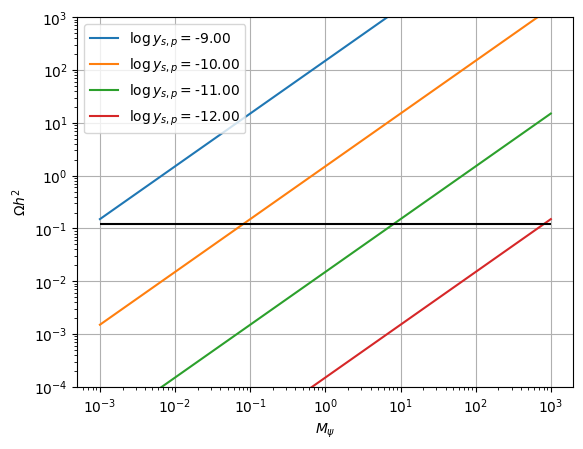

In [5]:
for i in range(len(ys)):
    plt.loglog(Mpsis,Omegah2[i],label=r'$\log y_{s,p}=$%.2f'%np.log10(ys[i]))
plt.hlines(0.12,1e-3,1e3,colors='k')
plt.grid()
plt.xlabel(r'$M_\psi$')
plt.ylabel(r'$\Omega h^2$')
plt.ylim(1e-4,1e3)
plt.legend()
plt.show()


$$\Omega_\psi h^2\approx 0.3\left(\dfrac{M_\psi}{0.1\text{ GeV}}\right)\left(\dfrac{1\text{ TeV}}{M_S}\right)\left(\dfrac{y_{s,p}}{10^{-10}}\right)^2$$

$$y_{s,p}=10^{-10}\sqrt{0.04\cdot \left(\dfrac{0.1\text{ GeV}}{M_\psi}\right)\left(\dfrac{M_S}{1\text{ TeV}}\right)}$$

In [6]:
MSs = np.array([10,100,1000,10000])
Mpsis = np.logspace(-3,4,100) # GeV

ysp = []

for MS in MSs:
    ysp.append(1e-10*(0.04*(0.1/Mpsis)*(MS/1000))**0.5)

ysp = np.array(ysp)

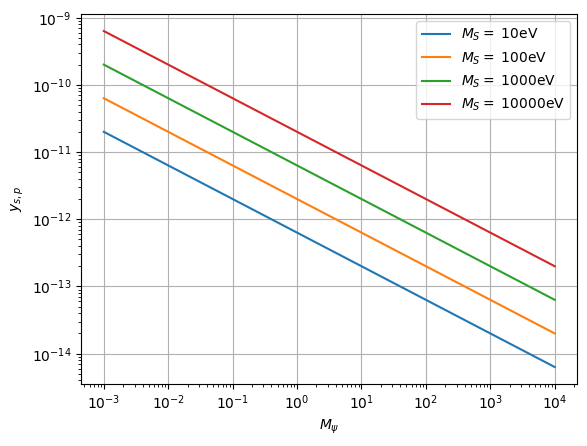

In [7]:
for i in range(len(MSs)):
    plt.loglog(Mpsis,ysp[i],label=r'$M_S=$%  GeV'%MSs[i])

plt.grid()
plt.xlabel(r'$M_\psi$')
plt.ylabel(r'$y_{s,p}$')
plt.legend()
plt.show()


In [8]:
rdof = pd.read_csv('https://raw.githubusercontent.com/SantiagoJulioD/Trabajo_de_grado/refs/heads/main/FIMP_fermion/rdof.csv')
rdof

,Temp,g_s,g_rho
0,500000.000000,104.51300,104.51600
1,453079.000000,104.51000,104.51300
2,410562.000000,104.50700,104.51000
3,372034.000000,104.50400,104.50700
4,337122.000000,104.50100,104.50400
...,...,...,...
246,0.000015,3.91752,3.37064
247,0.000013,3.91750,3.37062
248,0.000012,3.91751,3.37063
249,0.000011,3.91757,3.37070


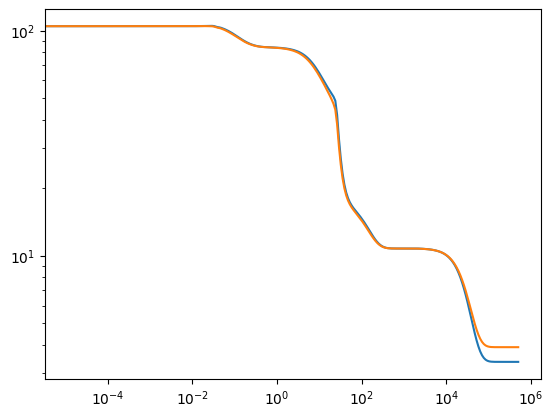

In [9]:
plt.loglog(rdof['Temp'][::-1],rdof['g_rho'])
plt.loglog(rdof['Temp'][::-1],rdof['g_s'])

In [10]:
MP = 2.4e18 # GeV

In [11]:
gstar_s = interp1d(rdof['Temp'][::-1],rdof['g_s'][::-1],bounds_error=False,fill_value=(rdof['g_s'].values[-1],rdof['g_s'].values[0]))
gstar_rho = interp1d(rdof['Temp'][::-1],rdof['g_rho'][::-1],bounds_error=False,fill_value=(rdof['g_rho'].values[-1],rdof['g_rho'].values[0]))

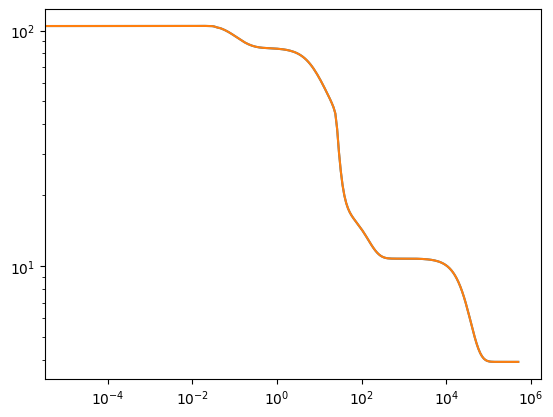

In [12]:
plt.loglog(rdof['Temp'][::-1],rdof['g_s'])
plt.loglog(rdof['Temp'][::-1],gstar_s(rdof['Temp']))


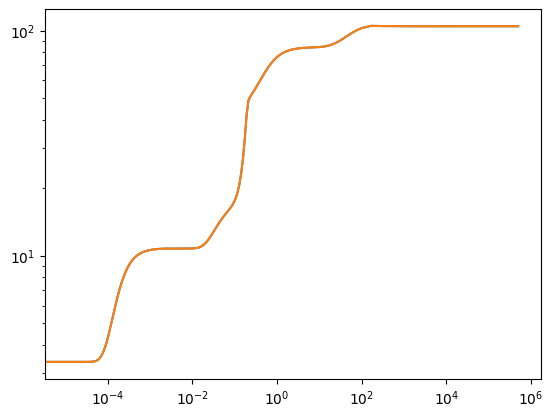

In [13]:
plt.loglog(rdof['Temp'],rdof['g_rho'])
plt.loglog(rdof['Temp'],gstar_rho(rdof['Temp']))


In [14]:
T0 = 2.725*ct.k_B.value/ct.e.value*1e-9
gstars0 = 3.91
gstar0 = 3.38
s0 = 2*np.pi**2/45*gstars0*T0**3

In [15]:
def GammaS_psi(Mpsi,MS,ys,yp):
    return MS/(8*np.pi)*(ys**2*(1-4*Mpsi**2/MS**2)**1.5+yp**2*(1-4*Mpsi**2/MS**2)**0.5)

In [ ]:
def Omegapsi(Mpsi,MS,ys,yp,gS):
    alpha = ys**2*(1-4*Mpsi**2/MS**2)**1.5+yp**2*(1-4*Mpsi**2/MS**2)**0.5
    integrand = lambda x: kn(1,x)*x**3/((gstar_rho(MS/x))**0.5*gstar_s(MS/x))
    I = quad(integrand,MS*1e-12,np.inf)[0]
    const = gS*45*MP*alpha/((np.pi**2/90)**0.5*16*np.pi**5*MS)  # ¿Por qué 4 en lugar de 16 o 32 (que sería el más correcto)?
    Y = const*I
    return 

Omegapsi = np.vectorize(Omegapsi)

In [46]:
Omegapsi(1e-3,2000.,1e-9,1e-9,1)

array(0.08316195)

In [18]:
ys = np.array([1e-9,1e-10,1e-11,1e-12])
Mpsis = np.logspace(-3,2.99,1000) # GeV
MS = 2000

Omegah2 = []

for y in ys:
    Omegah2.append(Omegapsi(Mpsis,MS,y,y,1))

Omegah2 = np.array(Omegah2)

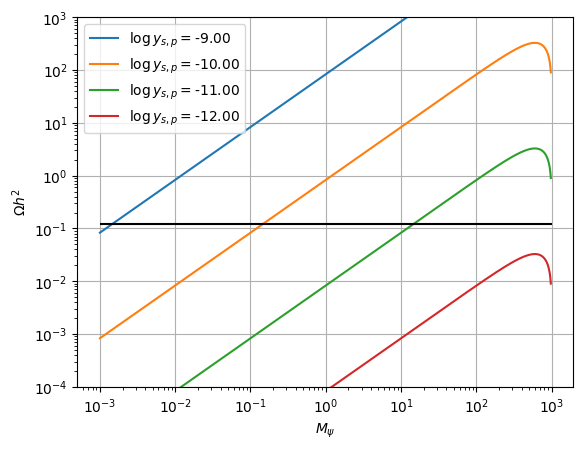

In [19]:
for i in range(len(ys)):
    plt.loglog(Mpsis,Omegah2[i],label=r'$\log y_{s,p}=$%.2f'%np.log10(ys[i]))
plt.hlines(0.12,1e-3,1e3,colors='k')
plt.grid()
plt.xlabel(r'$M_\psi$')
plt.ylabel(r'$\Omega h^2$')
plt.ylim(1e-4,1e3)
plt.legend()
plt.show()


In [18]:
y = np.logspace(-12.2,-8.5,100)
Mpsis = np.logspace(-3,4,100) # GeV
MSs = np.array([10,100,1000,10000])
Y,MPsis = np.meshgrid(y,Mpsis)

Omegah2s = []

for m in MSs:
    Omegah2s.append(Omegapsi(MPsis,m,Y,0,1))

Omegah2 = np.array(Omegah2)

/tmp/ipykernel_782185/3778809655.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand,MS*1e-12,np.inf)[0]
/tmp/ipykernel_782185/3778809655.py:2: RuntimeWarning: invalid value encountered in scalar power
  alpha = ys**2*(1-4*Mpsi**2/MS**2)**1.5+yp**2*(1-4*Mpsi**2/MS**2)**0.5


KeyboardInterrupt: 

In [ ]:
Omegah2s = np.array(Omegah2s)

In [ ]:
Omegah2p = []

for m in MSs:
    Omegah2p.append(Omegapsi(MPsis,m,0,Y,1))

Omegah2p = np.array(Omegah2p)

/tmp/ipykernel_117854/3778809655.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand,MS*1e-12,np.inf)[0]
/tmp/ipykernel_117854/3778809655.py:2: RuntimeWarning: invalid value encountered in scalar power
  alpha = ys**2*(1-4*Mpsi**2/MS**2)**1.5+yp**2*(1-4*Mpsi**2/MS**2)**0.5


In [ ]:
np.log10(Y)

array([[-12.2       , -12.16262626, -12.12525253, ...,  -8.57474747,
         -8.53737374,  -8.5       ],
       [-12.2       , -12.16262626, -12.12525253, ...,  -8.57474747,
         -8.53737374,  -8.5       ],
       [-12.2       , -12.16262626, -12.12525253, ...,  -8.57474747,
         -8.53737374,  -8.5       ],
       ...,
       [-12.2       , -12.16262626, -12.12525253, ...,  -8.57474747,
         -8.53737374,  -8.5       ],
       [-12.2       , -12.16262626, -12.12525253, ...,  -8.57474747,
         -8.53737374,  -8.5       ],
       [-12.2       , -12.16262626, -12.12525253, ...,  -8.57474747,
         -8.53737374,  -8.5       ]])

In [ ]:
Omegah2s[0][2]

array([2.61077169e-05, 3.10110427e-05, 3.68352688e-05, 4.37533508e-05,
       5.19707271e-05, 6.17314201e-05, 7.33252821e-05, 8.70966031e-05,
       1.03454335e-04, 1.22884234e-04, 1.45963289e-04, 1.73376853e-04,
       2.05938996e-04, 2.44616679e-04, 2.90558470e-04, 3.45128652e-04,
       4.09947734e-04, 4.86940576e-04, 5.78393548e-04, 6.87022427e-04,
       8.16053044e-04, 9.69317077e-04, 1.15136584e-03, 1.36760542e-03,
       1.62445726e-03, 1.92954878e-03, 2.29193997e-03, 2.72239233e-03,
       3.23368854e-03, 3.84101198e-03, 4.56239767e-03, 5.41926778e-03,
       6.43706784e-03, 7.64602231e-03, 9.08203216e-03, 1.07877410e-02,
       1.28138013e-02, 1.52203788e-02, 1.80789388e-02, 2.14743689e-02,
       2.55074993e-02, 3.02980975e-02, 3.59884244e-02, 4.27474594e-02,
       5.07759179e-02, 6.03122121e-02, 7.16395308e-02, 8.50942485e-02,
       1.01075915e-01, 1.20059120e-01, 1.42607587e-01, 1.69390912e-01,
       2.01204450e-01, 2.38992931e-01, 2.83878519e-01, 3.37194130e-01,
      

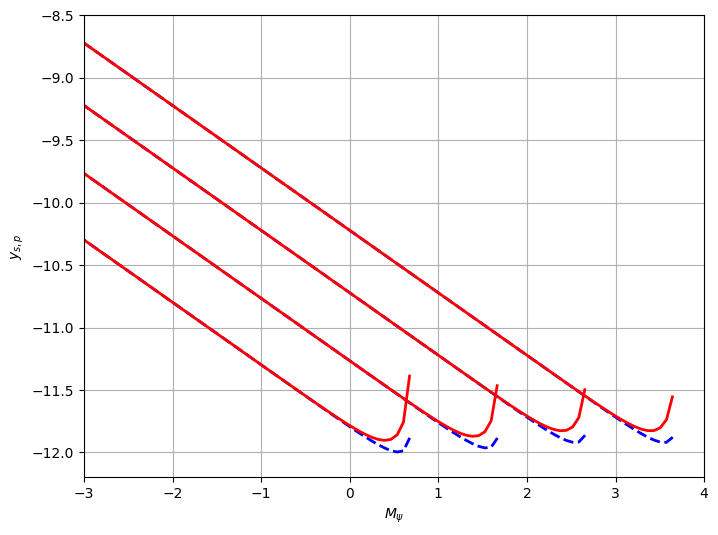

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(len(MSs)):
    ax.contour(np.log10(MPsis),np.log10(Y),np.log10(Omegah2p[i]),levels=[np.log10(0.12),],linewidths=2,colors='b',linestyles='dashed')
    ax.contour(np.log10(MPsis),np.log10(Y),np.log10(Omegah2s[i]),levels=[np.log10(0.12),],linewidths=2,colors='r',linestyles='solid')
plt.grid()
plt.xlabel(r'$M_\psi$')
plt.ylabel(r'$y_{s,p}$')
plt.show()


In [25]:
df1 = pd.read_csv('omega_y-9.csv')
df2 = pd.read_csv('omega_y-10.csv')
df3 = pd.read_csv('omega_y-11.csv')
df4 = pd.read_csv('omega_y-12.csv')

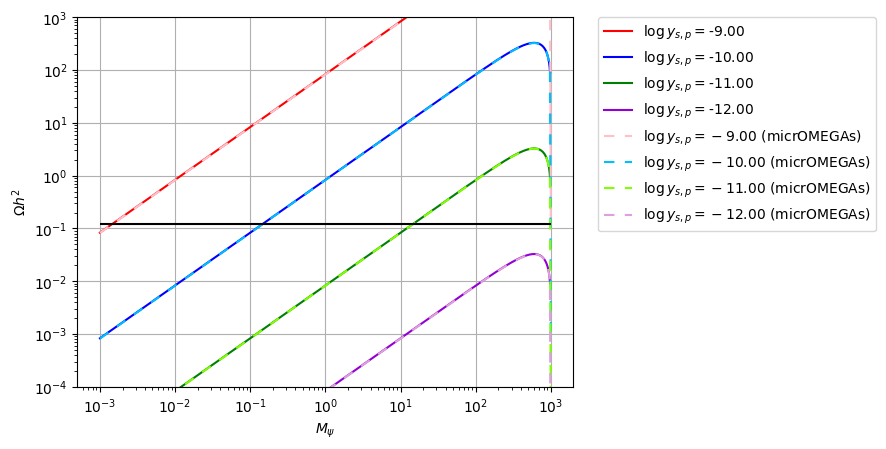

In [41]:
colors = ['r','b','g','darkviolet']
for i in range(len(ys)):
    plt.loglog(Mpsis,Omegah2[i],label=r'$\log y_{s,p}=$%.2f'%np.log10(ys[i]),color=colors[i])
plt.loglog(df1['Mp1'],df1['Omega'],linestyle=(0, (5, 5)),color='pink',label=r'$\log y_{s,p}=-9.00$ (micrOMEGAs)')
plt.loglog(df2['Mp1'],df2['Omega'],linestyle=(0, (5, 5)),color='deepskyblue',label=r'$\log y_{s,p}=-10.00$ (micrOMEGAs)')
plt.loglog(df3['Mp1'],df3['Omega'],linestyle=(0, (5, 5)),color='chartreuse',label=r'$\log y_{s,p}=-11.00$ (micrOMEGAs)')
plt.loglog(df4['Mp1'],df4['Omega'],linestyle=(0, (5, 5)),color='plum',label=r'$\log y_{s,p}=-12.00$ (micrOMEGAs)')
plt.hlines(0.12,1e-3,1e3,colors='k')
plt.grid()
plt.xlabel(r'$M_\psi$')
plt.ylabel(r'$\Omega h^2$')
plt.ylim(1e-4,1e3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [49]:
A = np.logspace(-9,-12,4)
isinstance(A,np.ndarray)

True